In [1]:
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_fpn, fasterrcnn_resnet50_fpn_v2
from utils import *

In [2]:
models = {
    'mobilenet_v3_large_fpn': RCNN_YOLO(fasterrcnn_mobilenet_v3_large_fpn(pretrained=True).to('cpu')),
    'resnet50_v2_fpn': RCNN_YOLO(fasterrcnn_resnet50_fpn_v2(pretrained=True).to('cpu')),
    'yolov10s_small': YOLO('yolov10s'),
    'yolov11n_nano': YOLO('yolo11n'),
    'yolov11s_small': YOLO('yolo11s'),
    'yolov11m_medium': YOLO('yolo11m')
}

c:\Users\AbduM\Documents\VSCode\DS473-CV-Workspace\project\.conda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\AbduM\Documents\VSCode\DS473-CV-Workspace\project\.conda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\AbduM\Documents\VSCode\DS473-CV-Workspace\project\.conda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the fut

------------------------------
Model name: FasterRCNN
Model size: 74 MB
Number of parameters: 19.4 million
------------------------------

------------------------------
Model name: FasterRCNN
Model size: 167 MB
Number of parameters: 43.7 million
------------------------------

------------------------------
Model name: DetectionModel
Model size: 31 MB
Number of parameters: 8.1 million
------------------------------

------------------------------
Model name: DetectionModel
Model size: 10 MB
Number of parameters: 2.6 million
------------------------------

------------------------------
Model name: DetectionModel
Model size: 36 MB
Number of parameters: 9.5 million
------------------------------

------------------------------
Model name: DetectionModel
Model size: 77 MB
Number of parameters: 20.1 million
------------------------------



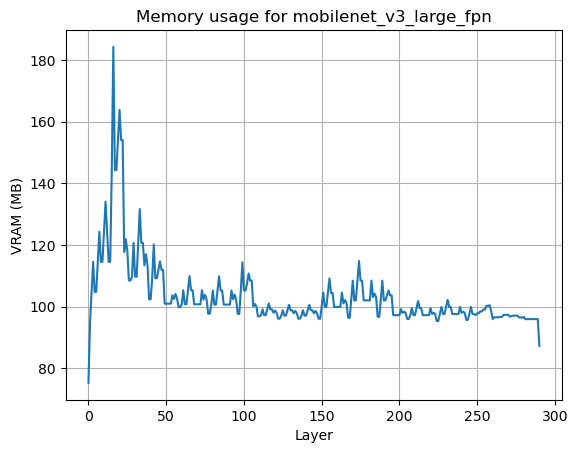

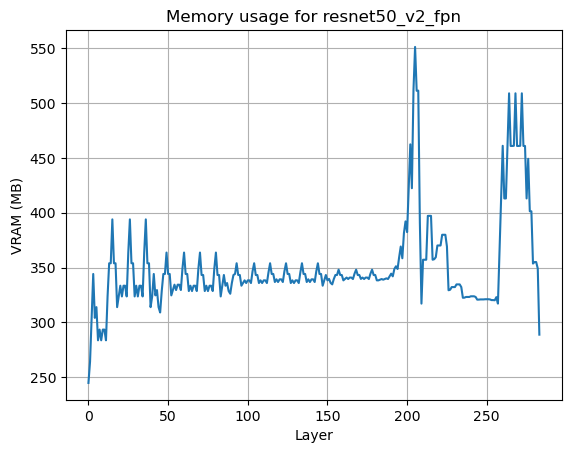

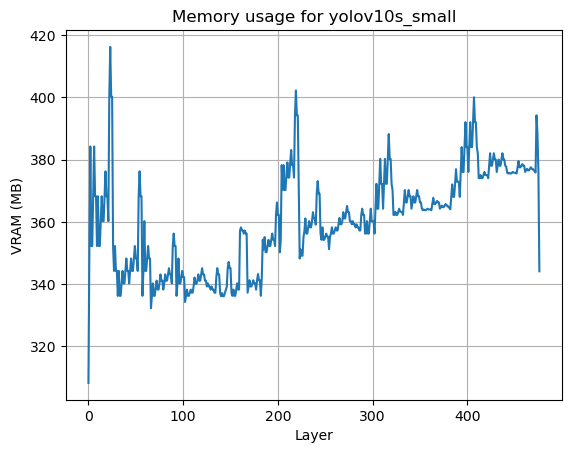

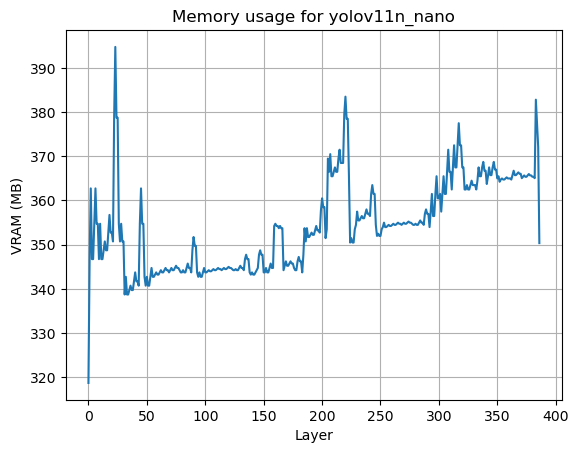

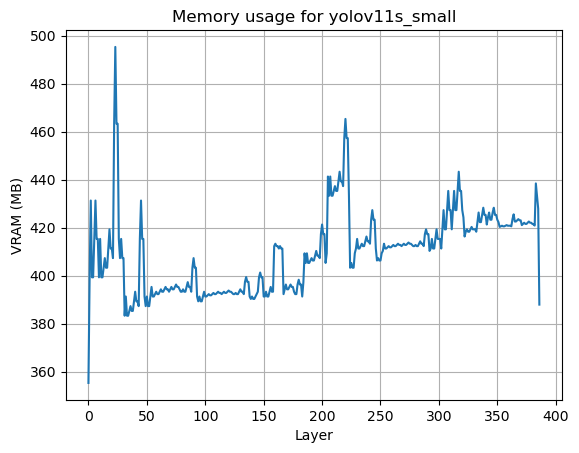

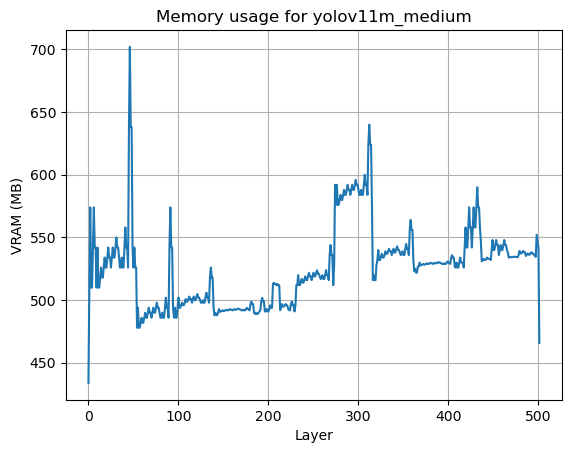

In [ ]:
import json

sizes = {}
for name, model in models.items():
    d = measure_inference_vram(model, name)
    sizes[name] = d
    dd = get_model_size(model)
    sizes[name]['all_mb'] = round(d['peak'] + dd['mb'], 1)
    sizes[name]['nparams'] = f"{dd['nparams']:,}"
    sizes[name]['model_size_mb'] = round(dd['mb'], 1)
    sizes[name]['inference_cost_mb'] = round(sizes[name]['peak'], 1)
    del sizes[name]['peak']
    del sizes[name]['plot']

formatted_summary = json.dumps(sizes, indent=4)

In [4]:
print(formatted_summary)

{
    "mobilenet_v3_large_fpn": {
        "model_name": "mobilenet_v3_large_fpn",
        "all_mb": 183.0,
        "nparams": "19,386,354",
        "model_size_mb": 74.0,
        "inference_cost_mb": 109.1
    },
    "resnet50_v2_fpn": {
        "model_name": "resnet50_v2_fpn",
        "all_mb": 473.1,
        "nparams": "43,712,278",
        "model_size_mb": 166.7,
        "inference_cost_mb": 306.3
    },
    "yolov10s_small": {
        "model_name": "yolov10s_small",
        "all_mb": 139.0,
        "nparams": "8,128,272",
        "model_size_mb": 31.0,
        "inference_cost_mb": 108.0
    },
    "yolov11n_nano": {
        "model_name": "yolov11n_nano",
        "all_mb": 86.0,
        "nparams": "2,624,080",
        "model_size_mb": 10.0,
        "inference_cost_mb": 76.0
    },
    "yolov11s_small": {
        "model_name": "yolov11s_small",
        "all_mb": 176.1,
        "nparams": "9,458,752",
        "model_size_mb": 36.1,
        "inference_cost_mb": 140.0
    },
    "yolov1

In [5]:
with open('custom_val_output/memory_usage.json', 'w') as f:
    f.write(formatted_summary)